Notebook for greated choropleth heatmaps 

Required files 
- Hospital Selection Nepal.xlsx (contains all of the patient/population data and the nodes of connection)
- points.csv (contains the raw points of all populations)
- hosp_chosen.csv (is simply the hospital chosen for each time parameter)

# Data Loading/ Prep

In [ ]:
import pandas as pd

# Breaking down the different time parameters between baseline/3 hosp/5 hosp into df's
df_base = pd.read_excel('Hospital Selection Nepal.xlsx', sheet_name = 1, header = 0)
df3 = pd.read_excel('Hospital Selection Nepal.xlsx', sheet_name = 2, header = 0)
df5 = pd.read_excel('Hospital Selection Nepal.xlsx', sheet_name = 3, header = 0)
points = pd.read_csv('points.csv')
hosp = pd.read_csv('hosp_chosen.csv')

In [ ]:
# setting copy df's as well as center of Nepal for reference
baseline_6 = df_base[df_base['Total_TravelTime'] <= 360].copy().reset_index(drop = True)
population3_6 = df3.copy().reset_index(drop = True)
population5_6 = df5.copy().reset_index(drop = True)
center_coors = [28.120353, 84.184600]

"""Mergining all population points as a base in Nepal with the data"""
baseline_6 =  points.merge(baseline_6[['Name','Total_TravelTime']], how = 'left', left_on= 'OBJECTID *',right_on= 'Name')
coord_df3_6 = points.merge(population3_6[['DemandID.1','Total_TravelTime.1']], how = 'left', left_on= 'OBJECTID *',right_on= 'DemandID.1')
coord_df5_6 = points.merge(population5_6[['DemandID.1','Total_TravelTime.1']], how = 'left', left_on= 'OBJECTID *',right_on= 'DemandID.1')
coord_df3_6['Total_TravelTime_1_fulled'] = coord_df3_6['Total_TravelTime.1'].fillna(400) # arbitrary setting the nulls to 400 as to be outside the range of travel times 
coord_df5_6['Total_TravelTime_1_fulled'] = coord_df5_6['Total_TravelTime.1'].fillna(400)
baseline_6['Total_TravelTime_1_fulled'] = baseline_6['Total_TravelTime'].fillna(400)

In [ ]:
coord_df3_6.head()

OBJECTID *  ... Total_TravelTime.1
0           1  ...         179.710107
1           2  ...                NaN
2           3  ...          90.240556
3           4  ...                NaN
4           5  ...         179.999206

[5 rows x 101 columns]

In [ ]:
baseline_6.head()

OBJECTID *                                   GUBID  ... Name Total_TravelTime
0           1  {905EAB8E-C32F-456C-BDD0-2124254C30E9}  ...  1.0       179.710107
1           2  {4AD19883-D6AC-471A-AE4B-795692BB8B16}  ...  NaN              NaN
2           3  {1D2CAEAD-1559-4785-A41A-ED32979298C4}  ...  NaN              NaN
3           4  {2E22CC50-94DD-4146-A1FE-E1950F741FAC}  ...  NaN              NaN
4           5  {59F56555-702D-4F05-9FC8-37562C95D513}  ...  5.0       179.999206

[5 rows x 101 columns]

In [ ]:
coord_df3_6.head()

OBJECTID * Shape *  ... Total_TravelTime.1 Total_TravelTime_1_fulled
0           1   Point  ...         179.710107                179.710107
1           2   Point  ...                NaN                400.000000
2           3   Point  ...          90.240556                 90.240556
3           4   Point  ...                NaN                400.000000
4           5   Point  ...         179.999206                179.999206

[5 rows x 103 columns]

# Simple stats to see how the data looks [Optional/skip]


In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
df_no_zero = df[df['duration_full'] != 0]
fig = plt.figure(figsize=(20,10))
plt.hist(df_no_zero['duration_full'], bins=50, label = 'full') #show distributions of numeric data
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.hist(df_no_zero[df_no_zero['Treatment in another hospital? (1=yes,0=no)'] == '0']['duration_full'],alpha = 0.5, bins=50, label = 'Not Referred') 
plt.hist(df_no_zero[df_no_zero['Treatment in another hospital? (1=yes,0=no)'] == '1']['duration_full'],alpha = 0.5, bins=50, label = 'Referred Hosp') 
plt.legend(loc = 'upper right')
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
data = [df_no_zero[df_no_zero['duration_full'] <= 120]['duration_full'],
        df_no_zero[df_no_zero['Treatment in another hospital? (1=yes,0=no)'] == '0'][df_no_zero['duration_full'] <= 120]['duration_full'],
        df_no_zero[df_no_zero['Treatment in another hospital? (1=yes,0=no)'] == '1'][df_no_zero['duration_full'] <= 120]['duration_full']]
plt.boxplot(data, vert = False) 
random_dists = ['Full','Not Referred', 'Referred']
ax.set_yticklabels(random_dists,
                    rotation=45, fontsize=8)
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
data = [df_no_zero[df_no_zero['duration_full'] <= 120]['duration_full'],
        df_no_zero[ (df_no_zero['duration_full'] <= 360)]['duration_full'],
        df_no_zero[ (df_no_zero['duration_full'] <= 720)]['duration_full'],
        df_no_zero[ (df_no_zero['duration_full'] <= 1440)]['duration_full']
]
box = plt.boxplot(data, vert = False, patch_artist= True, widths= [0.8,0.8,0.8,0.8], showmeans=True, meanline=True) 


random_dists = ['2 hours','6 hours', '12 hours', '24 hours']
colors = ['blue', 'green', 'purple', 'pink', 'red']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
ax.set_yticklabels(random_dists,
                    rotation=45, fontsize=15)
plt.legend([box['medians'][0], box['means'][0]], ['median', 'mean'] , loc = 'upper right', fontsize = 15)
plt.show()


In [ ]:
for i in data:
  print('Average: {}'.format(i.mean()))
  print('# of patients: {}'.format(len(i)))

Average: 30.726016393549155
# of patients: 610
Average: 129.9915951912919
# of patients: 1026
Average: 273.7937371109936
# of patients: 1552
Average: 342.4051765362569
# of patients: 1756


In [ ]:
len(data[0])

610

# Heatmap Choropleth

In [ ]:
%%capture
!pip install geopandas
!pip install geojsoncontour
!pip install plotly==4.6

In [ ]:
import os
from urllib.request import urlretrieve
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import json
import numpy as np
import timeit 
from datetime import datetime

from scipy.interpolate import griddata
from numpy import linspace

import plotly.express as px
from shapely.geometry import Polygon, MultiPolygon
import geopandas as gpd
import matplotlib.pyplot as plt
import geojsoncontour
import plotly.graph_objects as go
px.set_mapbox_access_token('pk.eyJ1IjoiZWZhd2UiLCJhIjoiY2tma3Q1bzlyMGl1dTJxcXJidmxvaWhvciJ9.fp1k2N6FBvKUFYYvBkALZA')

# Raw scatterplot of overall points 
- Can see to cover all of the points, ther must be filler points for the rest of Nepal

In [ ]:
fig = px.scatter_mapbox(coord_df3_6, lat="CENTROID_Y", lon="CENTROID_X", color="Total_TravelTime.1", color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=6)
fig.show()

In [ ]:
fig = px.scatter_mapbox(baseline_6, lat="CENTROID_Y", lon="CENTROID_X", color="Total_TravelTime_1_fulled", color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=6)
fig.show()

In [ ]:
fig = px.scatter_mapbox(coord_df3_6, lat="CENTROID_Y", lon="CENTROID_X", color="Total_TravelTime_1_fulled", color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=6)
fig.show()

# Meta for usage during the creation of the heatmaps

In [ ]:
list(hosp[hosp['ObjectID *'] != 5].reset_index(drop = True).Name.values)

['Sub Regional Hospital, Ghorahi',
 'Sagarmatha Zonal Hospital',
 'Seti Zonal Hospital',
 'Kirtipur Hospital']

In [ ]:
list(hosp[hosp['ObjectID *'] != 3].reset_index(drop = True).Name.values)

['Pokhara Regional Hospital',
 'Janakpur Zonal Hospital',
 'Rapti Zonal Hospital',
 'Seti Zonal Hospital',
 'Kirtipur Hospital',
 'Medical College Dharan']

In [ ]:
for i in range(0, len(price_geojson["features"])):
    print(price_geojson["features"][i]["properties"]["title"])

1.00-61.00 
61.00-121.00 
121.00-181.00 
181.00-241.00 
241.00-301.00 
301.00-361.00 
361.00-421.00 


# Manual input criteria
- Too time consuming/ no python packages are able to cut two geojsons so that it limits just the intersection so the next 3 cells outputs a json that can be taken into arcgis and preform a cut then output back out a correct limited geojson. 


In [ ]:
manual_input = True

#3 Hosp


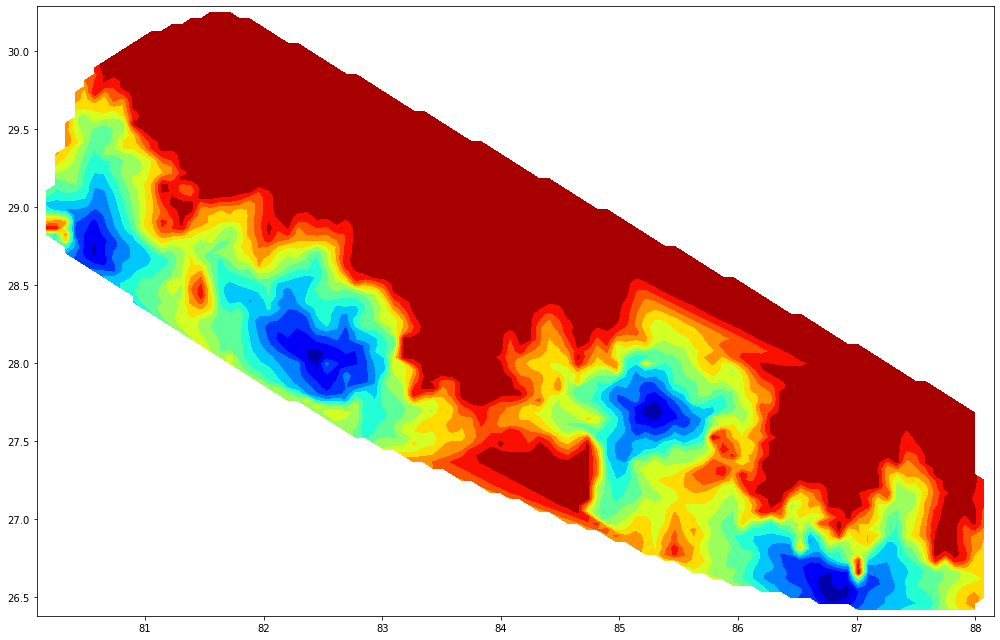

In [ ]:
x=coord_df3_6.CENTROID_X
y=coord_df3_6.CENTROID_Y
z=coord_df3_6['Total_TravelTime_1_fulled']

# Creats a spaced out array between min/max with 100 intervals
xi = linspace(x.min(),x.max(),100);
yi = linspace(y.min(),y.max(),100);

# creates a matrix from those two axis
X, Y = np.meshgrid(xi,yi)

# Choose npts random point from the discrete domain of our model function
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (14,9))
# Plot the model function and the randomly selected sample points
z=coord_df3_6['Total_TravelTime_1_fulled']
# Interpolate using three different methods and plot
zi = griddata((x, y), z, (X, Y), method='linear')


step_size=30
cs = plt.contourf(X,Y,zi,range(1,int( np.nanmax(zi))+step_size,step_size),cmap=plt.cm.jet)

plt.tight_layout()
plt.show()

import geojsoncontour

#Converting matplotplib contour plot to geojson
geojson = geojsoncontour.contourf_to_geojson(
    contourf=cs,
    ndigits=5,
   )

#reading geojson as dict
price_geojson=eval(geojson)

if manual_input:
  with open('data3_6.geojson') as json_file:
    price_geojson = json.load(json_file)

#Creating empty array to fill with prices
arr_temp=np.ones([len(price_geojson["features"]),2])

for i in range(0, len(price_geojson["features"])):
    price_geojson["features"][i]["id"]=i

#Filling array with price and Id for each geojson spatial object. Z value from contour plot will be stored as title
    arr_temp[i,0]=i
    temp = price_geojson["features"][i]["properties"]["title"].split('-')
    arr_temp[i,1]=float((float(temp[1]) +float(temp[0]))/2)
    
#Transforming array to df
df_contour=pd.DataFrame(arr_temp, columns=["Id","Price"])

import plotly.graph_objects as go

choro = go.Choroplethmapbox( geojson=price_geojson, locations=df_contour.Id,
                          z=df_contour.Price,       
                          showscale = True,
                          colorscale = 'jet',
                          reversescale = True,
                          marker_line_width=0,
                          marker=dict(opacity=0.5),
                           )
scatt = go.Scattermapbox( lat=list(hosp[hosp['ObjectID *'] != 5].reset_index(drop = True).SnapY),
        lon=list(hosp[hosp['ObjectID *'] != 5].reset_index(drop = True).SnapX),
        mode='markers',
        #hoverinfo='none',      
        text=list(hosp[hosp['ObjectID *'] != 5].reset_index(drop = True).Name.values),
        textposition = 'bottom right',
        textfont=dict(size=12, color='black'),                   
        marker=dict( size=12, color =['rgb(124, 252, 0)','rgb(124, 252, 0)','rgb(124, 252, 0)','rgb(255, 255, 153)']))

fig = go.Figure(data = [scatt,choro])
fig.update_layout(mapbox_style="light",
                  mapbox_zoom=6, mapbox_center = {"lat": center_coors[0], "lon": center_coors[1]}, mapbox_accesstoken = 'pk.eyJ1IjoiZWZhd2UiLCJhIjoiY2tma3Q1bzlyMGl1dTJxcXJidmxvaWhvciJ9.fp1k2N6FBvKUFYYvBkALZA')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, height = 1000)
fig.show()

with open('data3_6.txt', 'w') as outfile:
    json.dump(price_geojson, outfile)

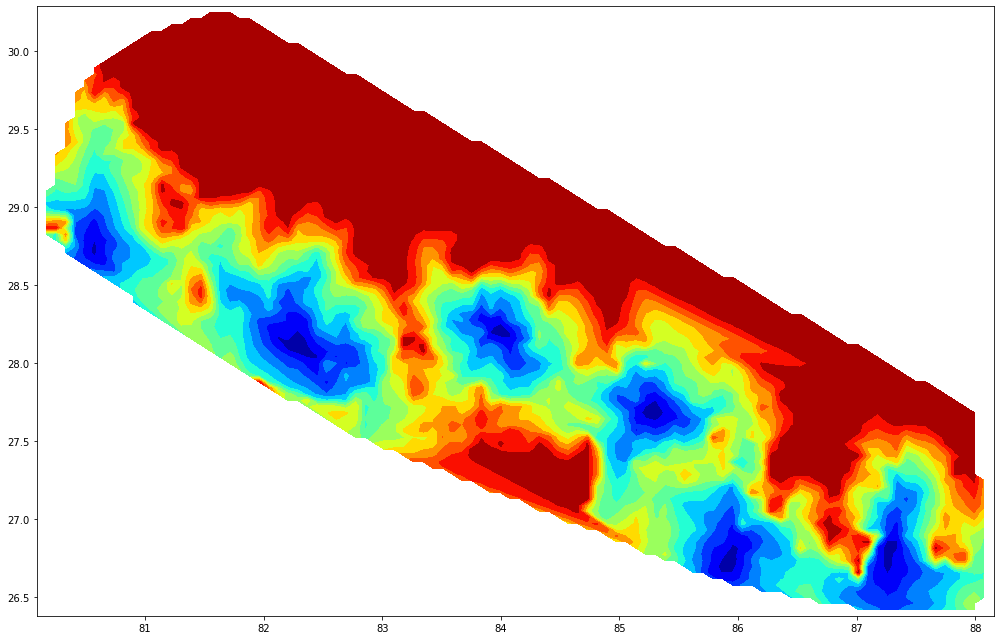

In [ ]:
z=coord_df5_6['Total_TravelTime_1_fulled']
y=coord_df5_6.CENTROID_Y
x=coord_df5_6.CENTROID_X
xi = linspace(x.min(),x.max(),100);
yi = linspace(y.min(),y.max(),100);

X, Y = np.meshgrid(xi,yi)

# Choose npts random point from the discrete domain of our model function
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (14,9))
# Plot the model function and the randomly selected sample points
#ax.contourf(X, Y, T)
z=coord_df5_6['Total_TravelTime_1_fulled']
# Interpolate using three different methods and plot
zi = griddata((x, y), z, (X, Y), method='linear')

step_size=30
cs = plt.contourf(X,Y,zi,range(1,int( np.nanmax(zi))+step_size,step_size),cmap=plt.cm.jet)

#ax.contourf(X, Y, Ti)
#ax.set_title("method = '{}'".format(method))

plt.tight_layout()
plt.show()

import geojsoncontour

#Converting matplotplib contour plot to geojson
geojson = geojsoncontour.contourf_to_geojson(
    contourf=cs,
    ndigits=5,
   )

#reading geojson as dict
price_geojson=eval(geojson)

if manual_input:
  with open('data5_6.geojson') as json_file:
    price_geojson = json.load(json_file)


#Creating empty array to fill with prices
arr_temp=np.ones([len(price_geojson["features"]),2])

for i in range(0, len(price_geojson["features"])):
    price_geojson["features"][i]["id"]=i

#Filling array with price and Id for each geojson spatial object. Z value from contour plot will be stored as title
    arr_temp[i,0]=i
    temp = price_geojson["features"][i]["properties"]["title"].split('-')
    arr_temp[i,1]=float((float(temp[1]) +float(temp[0]))/2)
    
#Transforming array to df
df_contour=pd.DataFrame(arr_temp, columns=["Id","Price"])

choro = go.Choroplethmapbox( geojson=price_geojson, locations=df_contour.Id,
                          z=df_contour.Price,       
                          showscale = True,
                          colorscale = 'jet',
                          reversescale = True,
                          marker_line_width=0,
                          marker=dict(opacity=0.5),
                           )
scatt = go.Scattermapbox( lat=list(hosp[hosp['ObjectID *'] != 3].reset_index(drop = True).SnapY),
        lon=list(hosp[hosp['ObjectID *'] != 3].reset_index(drop = True).SnapX),
        mode='markers',
        #hoverinfo='none',      
        text=list(hosp[hosp['ObjectID *'] != 3].reset_index(drop = True).Name.values),
        textposition = 'bottom right',
        textfont=dict(size=12, color='black'),                   
        marker=dict( size=12, color =['rgb(124, 252, 0)','rgb(124, 252, 0)','rgb(124, 252, 0)','rgb(124, 252, 0)','rgb(255, 255, 153)','rgb(124, 252, 0)']))

fig = go.Figure(data = [scatt,choro])
fig.update_layout(mapbox_style="light",
                  mapbox_zoom=6, mapbox_center = {"lat": center_coors[0], "lon": center_coors[1]}, mapbox_accesstoken = 'pk.eyJ1IjoiZWZhd2UiLCJhIjoiY2tma3Q1bzlyMGl1dTJxcXJidmxvaWhvciJ9.fp1k2N6FBvKUFYYvBkALZA')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, height = 1000)
fig.show()


with open('data5_6.txt', 'w') as outfile:
    json.dump(price_geojson, outfile)

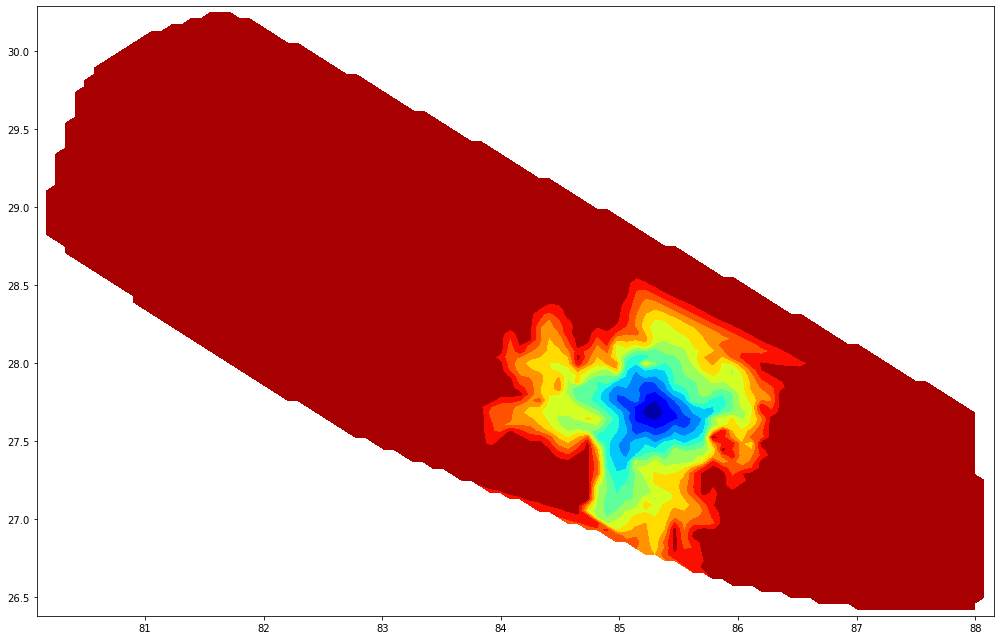

In [ ]:
z=baseline_6['Total_TravelTime_1_fulled']
y=baseline_6.CENTROID_Y
x=baseline_6.CENTROID_X
xi = linspace(x.min(),x.max(),100);
yi = linspace(y.min(),y.max(),100);

X, Y = np.meshgrid(xi,yi)

# Choose npts random point from the discrete domain of our model function
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (14,9))
# Plot the model function and the randomly selected sample points
#ax.contourf(X, Y, T)
z=baseline_6['Total_TravelTime_1_fulled']
# Interpolate using three different methods and plot
zi = griddata((x, y), z, (X, Y), method='linear')

step_size=30
cs = plt.contourf(X,Y,zi,range(1,int( np.nanmax(zi))+step_size,step_size),cmap=plt.cm.jet)

#ax.contourf(X, Y, Ti)
#ax.set_title("method = '{}'".format(method))

plt.tight_layout()
plt.show()

import geojsoncontour

#Converting matplotplib contour plot to geojson
geojson = geojsoncontour.contourf_to_geojson(
    contourf=cs,
    ndigits=5,
   )

#reading geojson as dict
price_geojson=eval(geojson)

if manual_input:
  with open('data_baseline.geojson') as json_file:
    price_geojson = json.load(json_file)


#Creating empty array to fill with prices
arr_temp=np.ones([len(price_geojson["features"]),2])

for i in range(0, len(price_geojson["features"])):
    price_geojson["features"][i]["id"]=i

#Filling array with price and Id for each geojson spatial object. Z value from contour plot will be stored as title
    arr_temp[i,0]=i
    temp = price_geojson["features"][i]["properties"]["title"].split('-')
    arr_temp[i,1]=float((float(temp[1]) +float(temp[0]))/2)
    
#Transforming array to df
df_contour=pd.DataFrame(arr_temp, columns=["Id","Price"])

choro = go.Choroplethmapbox( geojson=price_geojson, locations=df_contour.Id,
                          z=df_contour.Price,       
                          showscale = True,
                          colorscale = 'jet',
                          reversescale = True,
                          marker_line_width=0,
                          marker=dict(opacity=0.5),
                           )
scatt = go.Scattermapbox( lat=list(hosp[hosp['ObjectID *'] ==28].reset_index(drop = True).SnapY),
        lon=list(hosp[hosp['ObjectID *'] ==28].reset_index(drop = True).SnapX),
        mode='markers',
        #hoverinfo='none',      
        text=list(hosp[hosp['ObjectID *'] ==28].reset_index(drop = True).Name.values),
        textposition = 'bottom right',
        textfont=dict(size=12, color='black'),                   
        marker=dict( size=12, color =['rgb(255, 255, 153)']))

fig = go.Figure(data = [scatt,choro])
fig.update_layout(mapbox_style="light",
                  mapbox_zoom=6, mapbox_center = {"lat": center_coors[0], "lon": center_coors[1]}, mapbox_accesstoken = 'pk.eyJ1IjoiZWZhd2UiLCJhIjoiY2tma3Q1bzlyMGl1dTJxcXJidmxvaWhvciJ9.fp1k2N6FBvKUFYYvBkALZA')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, height = 1000)
fig.show()


with open('data_baseline.txt', 'w') as outfile:
    json.dump(price_geojson, outfile)